In [1]:
from settings import *
%matplotlib inline
config_dict = process_config()
info_file = config_dict['data']['exp_design']
info = pd.read_csv(info_file, index_col=0)
count_file = config_dict['counts']['tpms_4']
figures_dir = config_dict['out_dir']['figures']
results_dir = config_dict['out_dir']['tables']
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")


info = info[info.experiment !="E1"]
info['position'] = info['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})
count_file = config_dict['counts']['tpms_30']
cnts = pd.read_csv(count_file, index_col=0)

cnts_norm =  cnts.apply(vis.invnorm)
info["samples"] = [case_to_name[i] for i in info["case"]]


/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/lib/config


In [2]:
sef = ["PMI1117", "PMI1118", "PMI1119", "PMI1120", "PMI1121"]
ids = ["PMI2990", "PMI2991", "PMI2992", "PMI2993", "PMI2994", "PMI2995", "PMI2996"]
pef = ["PMI0750", "PMI0751", "PMI0752",
           "PMI0753", "PMI0754", "PMI0755", "PMI0756", "PMI0757"]


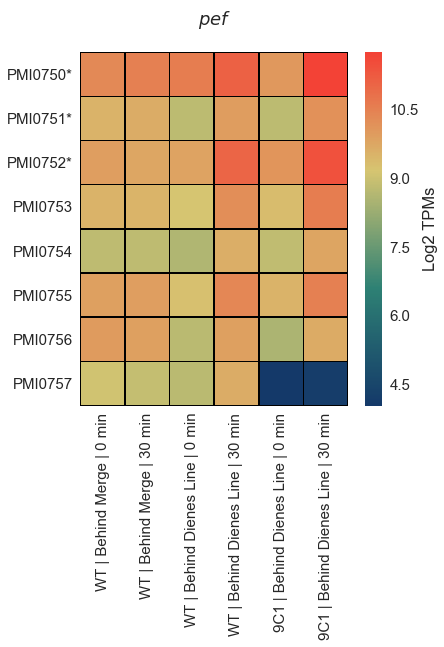

In [3]:
sns.set(font_scale=1.5)
fig, _ = vis.draw_heatmap_of_subset(cnts, info, pef, names=case_to_name,
                                 cases = ["Case13", "Case14", "Case12", "Case7", "Case11", "Case8"],
                                 subset_name="$\itpef$\n",draw=True,my_cmap= my_cmap, fs=(6,6.5))

stat_sig_9c1 = ["PMI0750", "PMI0751", "PMI0752"]
ax = fig.gca()
new_labels = ["{}*".format(n) if n in stat_sig_9c1 else n for n in pef ]
ax.set_yticklabels(new_labels);
ax.set_title("$\itpef$\n")
fig.savefig(os.path.join(figures_dir, "Figure_7a.png"), dpi=300, bbox_inches="tight")

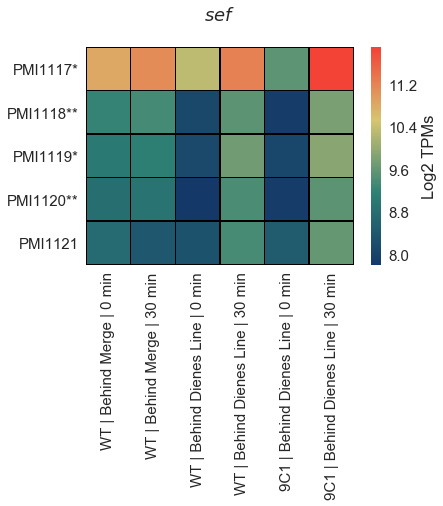

In [4]:
fig, _ = vis.draw_heatmap_of_subset(cnts, info, sef, names=case_to_name,
                                 cases = ["Case13", "Case14", "Case12", "Case7", "Case11", "Case8"],
                                 subset_name="$\itsef$\n",draw=True,my_cmap= my_cmap, fs=(6,4))
ax = fig.gca()
stat_sig_both =["PMI1118", "PMI1120"]
stat_sig_9c1 = ["PMI1117", "PMI1119"]
new_labels = []
for n in sef:
    if n in stat_sig_both:
        new_labels.append("{}**".format(n))
    elif n in stat_sig_9c1:
        new_labels.append("{}*".format(n))
    else:
        new_labels.append(n)
ax.set_title("$\itsef$\n")
ax.set_yticklabels(new_labels);
fig.savefig(os.path.join(figures_dir, "Figure_7b.png"), dpi=300, bbox_inches="tight")

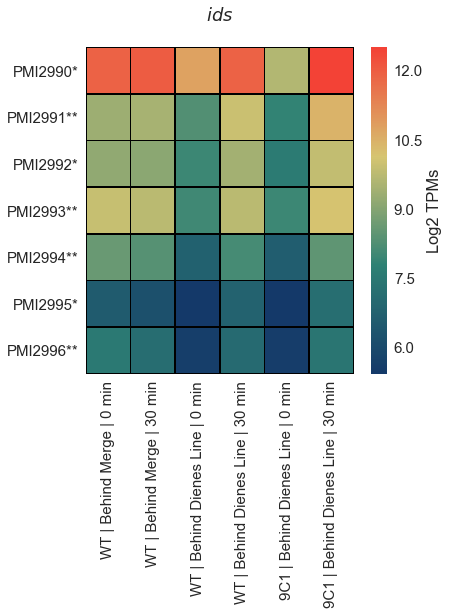

In [5]:
fig, _ = vis.draw_heatmap_of_subset(cnts, info, ids, names=case_to_name,
                                 cases = ["Case13", "Case14", "Case12", "Case7", "Case11", "Case8"],
                                 subset_name="$\itids$\n",draw=True,my_cmap= my_cmap, fs=(6,6))

stat_sig_both = ["PMI2991", "PMI2993", "PMI2994", "PMI2996"]
stat_sig_9c1 = ["PMI2990", "PMI2992", "PMI2995"]
ax = fig.gca()
new_labels = []
for n in ids:
    if n in stat_sig_both:
        new_labels.append("{}**".format(n))
    elif n in stat_sig_9c1:
        new_labels.append("{}*".format(n))
    else:
        new_labels.append(n)
ax.set_yticklabels(new_labels);
ax.set_title("$\itids$\n")
fig.savefig(os.path.join(figures_dir, "Figure_7c.png"), dpi=300, bbox_inches="tight")

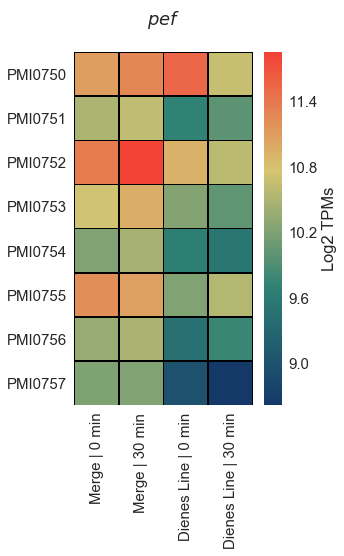

In [6]:
fig, _ = vis.draw_heatmap_of_subset(cnts, info, pef, names=case_to_name,
                                 cases = ["Case6", "Case5", "Case9", "Case10"],
                                 subset_name="$\itpef$\n",draw=True,my_cmap= my_cmap, fs=(4,6.5))
plt.title("$\itpef$\n");
fig.savefig(os.path.join(figures_dir, "Supplemental_figure_2a.png"), dpi=300, bbox_inches="tight")

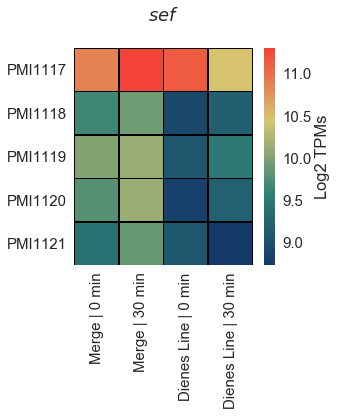

In [7]:
fig, _ = vis.draw_heatmap_of_subset(cnts, info, sef, names=case_to_name,
                                 cases = ["Case6", "Case5", "Case9", "Case10"],
                                 subset_name="$\itpef$\n",draw=True,my_cmap= my_cmap, fs=(4,4))
plt.title("$\itsef$\n");
fig.savefig(os.path.join(figures_dir, "Supplemental_figure_2b.png"), dpi=300, bbox_inches="tight")

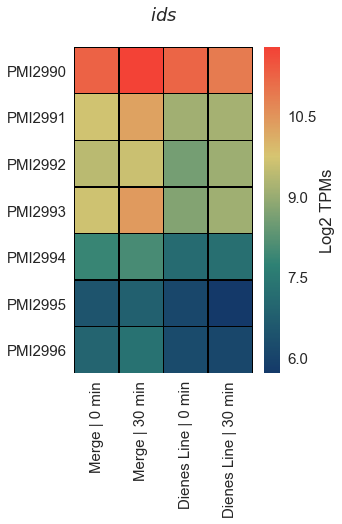

In [8]:
fig, _ = vis.draw_heatmap_of_subset(cnts, info, ids, names=case_to_name,
                                 cases = ["Case6", "Case5", "Case9", "Case10"],
                                 subset_name="$\itids$\n",draw=True,my_cmap= my_cmap, fs=(4,6))
plt.title("$\itids$\n");
fig.savefig(os.path.join(figures_dir, "Supplemental_figure_2c.png"), dpi=300, bbox_inches="tight")